# 1. Import data and split to train and test

## 1.1 fillna for y

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用原路径
file_path = '/home/hc/Desktop/01_model/all_data_clean_240729.csv'

# 读取CSV文件
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # 或使用 encoding='latin1'
    print(df.head())
except PermissionError:
    print("Permission denied: You don't have the necessary permissions to access this file.")
except FileNotFoundError:
    print("File not found: Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

                                               title  rating  price promotion  \
0  Nature Made Triple Omega 3 6 9, Flaxseed, Saff...     4.7  27.99       NaN   
1  Nordic Naturals Ultimate Omega, Lemon Flavor -...     4.6  34.99       NaN   
2  Purity Products Omega 3-6-9 Vegan and Vegetari...     4.7  15.95       NaN   
3  NOW Supplements, Omega-3 180 EPA / 120 DHA, Mo...     4.7  15.74       NaN   
4  Nature Made Fish Oil 1200 mg Softgels, Fish Oi...     4.7   9.99       NaN   

   review_num            Brand  \
0      8786.0      Nature Made   
1     50969.0  Nordic Naturals   
2      3273.0  Purity Products   
3     12367.0              NOW   
4     18539.0      Nature Made   

                                                link Manufacturer  \
0  https://www.amazon.com/Nature-Made-Softgels-Fl...          NaN   
1  https://www.amazon.com/Nordic-Naturals-Ultimat...          NaN   
2  https://www.amazon.com/Vegetarian-Formula-Esse...          NaN   
3  https://www.amazon.com/NOW-Su

In [3]:
#Ensure Consistent Data Types
import numpy as np
df.replace(to_replace=[None, 'nan', 'None', ''], value=np.nan, inplace=True)

In [4]:
df.dropna(subset=['rating'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 0 to 1233
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1203 non-null   object 
 1   rating                        1203 non-null   float64
 2   price                         1203 non-null   object 
 3   promotion                     357 non-null    object 
 4   review_num                    1182 non-null   float64
 5   Brand                         1153 non-null   object 
 6   link                          1203 non-null   object 
 7   Manufacturer                  289 non-null    object 
 8   Description_comb              1195 non-null   object 
 9   Primary Supplement Type_comb  502 non-null    object 
 10  Age Range_comb                611 non-null    object 
 11  Flavor_comb                   371 non-null    object 
 12  Unit Count_comb               845 non-null    object 
 13  Benefit_

In [5]:
df[['rating', 'review_num']].loc[df['review_num'].isnull()]

,rating,review_num
420,4.0,NaN
422,4.3,NaN
426,4.3,NaN
436,4.3,NaN
447,4.5,NaN
451,4.0,NaN
460,4.3,NaN
464,4.3,NaN
469,4.3,NaN
471,4.3,NaN


In [6]:
# 'review' number < 'rating' number, can use prediction to fillna, same 'rating', the null review number equals to the average
rating_record = df['rating'].loc[df['review_num'].isnull()].unique()
rating_record

array([4. , 4.3, 4.5])

In [7]:
rating_review_table = {}
for i in rating_record:
    rating_review_table[i] = int(df['review_num'].loc[df['rating']==i].mean())
rating_review_table

{np.float64(4.0): 1661, np.float64(4.3): 1036, np.float64(4.5): 2123}

In [8]:
rating_fill_idx = df.loc[df['review_num'].isnull()].index.tolist()
for idx in rating_fill_idx:
    print(df['review_num'][idx])
    df['review_num'][idx] = rating_review_table[df['rating'][idx]]
    print(df['review_num'][idx])

nan
1661.0
nan
1036.0
nan
1036.0
nan
1036.0
nan
2123.0
nan
1661.0
nan
1036.0
nan
1036.0
nan
1036.0
nan
1036.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1661.0
nan
1036.0
nan
1036.0
nan
1036.0


/tmp/ipykernel_2904/985271579.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['review_num'][idx] = rating_review_table[df['rating'][idx]]
/tmp/ipykernel_2904/985271579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [9]:
df['rating'].unique()

array([4.7, 4.6, 4.5, 4.8, 4. , 4.4, 4.2, 4.3, 3.9, 4.1, 5. , 3.7, 3.8,
       3.5, 2.9, 3.4, 4.9, 3.3, 3. , 3.6])

## 1.2 create popularity_score as y

In [10]:
rating = df['rating']
type(rating)

pandas.core.series.Series

In [11]:
# Apply log transformation to review_num
log_review_num = np.log1p(df['review_num'])

# Normalize rating and log_review_num
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform the data
log_review_num_norm = pd.Series(scaler.fit_transform(log_review_num.values.reshape(-1, 1)).flatten())
rating_num_norm = pd.Series(scaler.fit_transform(rating.values.reshape(-1, 1)).flatten())

# Create a composite popularity score
# Here, we give equal weight to rating and review number, but you can adjust the weights based on your preference
popularity_score = 0.5 * log_review_num_norm + 0.5 * rating_num_norm

In [12]:
series = pd.Series(popularity_score, name='Popularity_Score')
df['Popularity_Score'] = series

In [13]:
#y: 'Popularity_Score'
df.head()

,title,rating,price,promotion,review_num,Brand,link,Manufacturer,Description_comb,Primary Supplement Type_comb,Age Range_comb,Flavor_comb,Unit Count_comb,Benefit_comb,Ingredient_comb,Directions_updt,Diet Type_comb,Item_Form_updt,Popularity_Score
0,"Nature Made Triple Omega 3 6 9, Flaxseed, Saff...",4.7,27.99,NaN,8786.0,Nature Made,https://www.amazon.com/Nature-Made-Softgels-Fl...,NaN,Heart health support supplement: contains one ...,Phosphorus,NaN,NaN,150 Count,Heart Health Support,"Ingredients Omega-3 (as Alpha Linolenic Acid),...",NaN,Gluten Free,['softgel'],0.817985
1,"Nordic Naturals Ultimate Omega, Lemon Flavor -...",4.6,34.99,NaN,50969.0,Nordic Naturals,https://www.amazon.com/Nordic-Naturals-Ultimat...,NaN,Why omega-3s - Research shows that the essenti...,NaN,Adult,Lemon,90.0 Count,"Brain Health Support, Support Heart Health, Im...",Ingredients Purified deep sea fish oil (from a...,NaN,NaN,['softgel'],0.875790
2,Purity Products Omega 3-6-9 Vegan and Vegetari...,4.7,15.95,NaN,3273.0,Purity Products,https://www.amazon.com/Vegetarian-Formula-Esse...,NaN,A PLANT-POWERED VEGAN AND VEGETARIAN FORMULA: ...,NaN,Adult,Pomegranate,60.00 Count,Heart Health Support,Ingredients Vegetarian Omega Blend of - Flaxse...,Directions Adults take two soft gels daily. Op...,"Vegetarian, Vegan",['softgel'],0.772151
3,"NOW Supplements, Omega-3 180 EPA / 120 DHA, Mo...",4.7,15.74,NaN,12367.0,NOW,https://www.amazon.com/NOW-Supplements-Molecul...,NaN,"CARDIOVASCULAR SUPPORT*: Take 2 NOW Omega-3 1,...",Omega,NaN,NaN,200 Count,Heart Health Support,Ingredients Supplement FactsServing Size:2 Sof...,NaN,Kosher,['softgel'],0.833855
4,"Nature Made Fish Oil 1200 mg Softgels, Fish Oi...",4.7,9.99,NaN,18539.0,Nature Made,https://www.amazon.com/Nature-Made-Fish-Omega-...,NaN,Heart health support supplement: contains one ...,Vitamin,Adult,Fish,100 Count,"Dietary Supplement,Heart Health Support",NaN,"Directions Adults, take 2 softgels daily with ...",Gluten Free,['softgel'],0.852649


In [14]:
df.dropna(subset=['Popularity_Score'], inplace=True)

## 1.3 split train and text

In [15]:
features = df.columns.tolist()
target = 'Popularity_Score'
features.remove(target)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], 
    test_size=0.2,     # Proportion of the data to include in the test split (e.g., 0.2 for 20%)
    random_state=42    # Seed for the random number generator (for reproducibility)
)

# 2. Data tranfer

## 2.1 Numeric_Transformer

In [17]:
class Numeric_Transformer(object):
    """
    transfer the data to numeric
    including['price', 'promotion', 'Unit Count_comb']
    """
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['Price'] = X.price.map(self.price2num)
        self.pric_mean = df['Price'].mean()

        df['Unit Count'] = X['Unit Count_comb'].map(self.count_num)
        self.count_mean = df['Unit Count'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['Price'] = X.price.map(self.price2num)
        df['Price'].fillna(self.pric_mean, inplace=True)
        
        X['promotion'] = X['promotion'].replace(
            {
                '1 applicable promotion':'1 Applicable Promotion',
                '2 applicable promotion(s)':'2 Applicable Promotion(s)',
            }

        )
        df['Promotion'] = X.promotion.map(self.promot_to_num)

        df['Unit Count'] = X['Unit Count_comb'].map(self.count_num)
        df['Unit Count'].fillna(self.count_mean, inplace=True)
        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def price2num(self, x):
        """
        This function transforms a price string to a numerical value.
        """
        if isinstance(x, str):
            if len(x) > 8:
                return np.nan
            elif 'S$' in x:
                x = x.replace('S$', '').strip()
                return float(x) * 0.74
            else:
                x = x.replace('$', '').strip()
                return float(x) * 1.00
        return x

    def promot_to_num(self, value):
        """
        This function transforms a promotion string to a numerical value.
        """
        if pd.isna(value):
            return 0
        elif '1 Applicable Promotion' in value:
            return 1
        elif '2 Applicable Promotion(s)' in value:
            return 2
        elif '3 Applicable Promotion(s)' in value:
            return 3
        else:
            return 0  # or handle unexpected values

    def count_num(self, text):
        """
        This function transforms a 'unit count' string to a numerical value.
        """
        if type(text) == str:
            text = text.split()[0]
            # there are some mixing values
            if text in ['Softgel', 'Liquid']:
                return None
            return float(text)

In [18]:
tsf = Numeric_Transformer()

In [19]:
X_train_tsf = tsf.fit_transform(X_train)
X_test_tsf = tsf.transform(X_test)

/tmp/ipykernel_2904/914523896.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(self.pric_mean, inplace=True)
/tmp/ipykernel_2904/914523896.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [20]:
# visualize the relationship between x and y
comb_df = pd.concat([X_train_tsf, y_train], axis=1)
comb_df.head()

,Price,Promotion,Unit Count,Popularity_Score
821,59.92,0,140.00000,0.628434
599,18.99,0,30.00000,0.696515
184,19.74,0,19.50000,0.662113
1087,28.12,1,60.00000,0.455854
178,35.98,0,89.72017,0.392708


## 2.2 Categorical_Transformer_Freq

In [21]:
class Categorical_Transformer_Freq(object):
    """
    transfer the data to numeric
    including ['Brand', 'Manufacturer', 'Primary Supplement Type_comb', 'Age Range_comb','Flavor_comb', 'Item_Form_updt', 'Diet Type_comb']
    """

    def fit(self, X, y=None):
        """
        Fit the encoder by calculating frequencies of the values in the column.
        """
        # Ensure X is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        # Compute 'Brand' frequency counts
        #{3(high frequency): >10, 2(mid frequency): [2,11], 1(low frequency): 1, 0: null}
        self.brand_freq = X['Brand'].value_counts()
        self.brand_high = self.brand_freq[self.brand_freq > 10].index.tolist()
        self.brand_mid = self.brand_freq[(self.brand_freq > 1) & (self.brand_freq <= 11)].index.tolist()
        self.brand_low = self.brand_freq[self.brand_freq == 1].index.tolist()

        # Compute 'Manufacturer' frequency counts
        # {3:high freq, 2: mid freq, 1: low freq, 0: null}
        self.Manufacturer_freq = X['Manufacturer'].value_counts()
        self.Manufacturer_high = self.Manufacturer_freq[self.Manufacturer_freq >= 5].index.tolist()
        self.Manufacturer_mid = self.Manufacturer_freq[(self.Manufacturer_freq > 1) & (self.Manufacturer_freq < 5)].index.tolist()
        self.Manufacturer_low = self.Manufacturer_freq[self.Manufacturer_freq == 1].index.tolist()

        # Compute 'flavor' frequency counts
        # {3:high freq, 2: mid freq, 1: low freq, 0: null}
        X['Flavor_comb'] = X['Flavor_comb'].replace(
            {
                'Unflavored': None,
                'Unflavoured':None,
            }
        )
        self.flavor_freq = X['Flavor_comb'].value_counts()
        self.flavor_high = self.flavor_freq[self.flavor_freq >= 5].index.tolist()
        self.flavor_mid = self.flavor_freq[(self.flavor_freq > 1) & (self.flavor_freq < 5)].index.tolist()
        self.flavor_low = self.flavor_freq[self.flavor_freq == 1].index.tolist()

        # Compute 'Primary Supplement Type_comb' frequency counts
        # {3:high freq, 2: mid freq, 1: low freq, 0: null}
        self.supp_freq = X['Primary Supplement Type_comb'].value_counts()
        self.supp_high = self.supp_freq[self.supp_freq >= 10].index.tolist()
        self.supp_mid = self.supp_freq[(self.supp_freq > 1) & (self.supp_freq < 10)].index.tolist()
        self.supp_low = self.supp_freq[self.supp_freq == 1].index.tolist()

        ## Compute 'Primary Supplement Type_comb' frequency counts
        ## encoding: {2: common format, 1: seldom format, 0: no format infor}
        self.format_high = ['capsule', 'softgel', 'tablet', 'powder', 'gummy', 'lozenge']  

        # Compute 'age' frequency counts
        # {3:high freq, 2: mid freq, 1: low freq, 0: null}
        X['Age Range_comb'] = X['Age Range_comb'].replace(
            {
                'Adult,Kid':'All Ages',
                'All ages':'All Ages',
                'All Stages':'All Ages',
                'Adult,Senior': 'Adult',
                'Adult,Baby':'All Ages',
                'Over 18s': 'Adult',
                'Adults': 'Adult',
                'adult, teen': 'Adult,Teen',
                'Adult; Kid': 'over 6 years',
            }

        )
        self.age_dict = {'Adult': 0.8, 'Child ':0.2, 'All Ages':1, 'Teen':0.2, 'over 6 years':0.9, 'Adult,Teen':0.85, 'Above 3 years old':0.95, 'Baby':0.05, 'None':0}

        # Compute 'Diet Type' frequency counts
        # {3:high freq, 2: mid freq, 1: low freq, 0: null}
        self.diet_freq = X['Diet Type_comb'].value_counts()
        self.diet_high = self.diet_freq[self.diet_freq >= 10].index.tolist()
        self.diet_mid = self.diet_freq[(self.diet_freq > 1) & (self.diet_freq < 10)].index.tolist()
        self.diet_low = self.diet_freq[self.diet_freq == 1].index.tolist()
        
    def transform(self, X, y=None):
        """
        Transform the DataFrame by encoding the 'brand' column based on frequency.
        """
        df = pd.DataFrame()
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        df['Brand'] = X.Brand.map(self.brand2num)
        df['Manufacturer'] = X.Manufacturer.map(self.manu2num)
        df['Flavor'] = X.Flavor_comb.map(self.flavor2num)
        df['Primary_Supplement'] = X['Primary Supplement Type_comb'].map(self.supp2num)
        df['Item_Form'] = X.Item_Form_updt.map(self.form2num)
        Age = X['Age Range_comb'].replace(
            {
                'Adult,Kid':'All Ages',
                'All ages':'All Ages',
                'All Stages':'All Ages',
                'Adult,Senior': 'Adult',
                'Adult,Baby':'All Ages',
                'Over 18s': 'Adult',
                'Adults': 'Adult',
                'adult, teen': 'Adult,Teen',
                'Adult; Kid': 'over 6 years',
            }
        )
        df['Age_Range'] = Age.map(self.age2num)
        df['Diet_Type'] = X['Diet Type_comb'].map(self.diet2num)
        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def brand2num(self, name):
        if name in self.brand_high: return 3
        elif name in self.brand_mid: return 2
        elif name in self.brand_low: return 1
        else: return 0

    def manu2num(self, name):
        if name in self.Manufacturer_high: return 3
        elif name in self.Manufacturer_mid: return 2
        elif name in self.Manufacturer_low: return 1
        else: return 0

    def flavor2num(self, name):
        if name in self.flavor_high: return 3
        elif name in self.flavor_mid: return 2
        elif name in self.flavor_low: return 1
        elif name in ['Unflavored', 'Unflavoured']: return 0
        else: return 0

    def supp2num(self, name):
        if name in self.supp_high: return 3
        elif name in self.supp_mid: return 2
        elif name in self.supp_low: return 1
        else: return 0

    def form2num(self, names):
        if type(names) == float: return 0
        else:
            names = names.replace('[','')
            names = names.replace(']','')
            names = names.replace("'",'')
            #print(names, type(names))
            if names in self.format_high: 
                return 2
            elif names: 
                return 1
            else: return 0

    def age2num(self, name):
        if name:
            if name in self.age_dict.keys():
                return self.age_dict[name]
            else:
                return 0.1
        else:
            return 0

    def diet2num(self, name):
        if name in self.diet_high: return 3
        elif name in self.diet_mid: return 2
        elif name in self.diet_low: return 1
        else: return 0

In [22]:
tsf1 = Categorical_Transformer_Freq()

In [23]:
X_train_tsf1 = tsf1.fit_transform(X_train)

In [24]:
X_test_tsf1 = tsf1.transform(X_test)

In [25]:
X_train_tsf1.Item_Form.unique()

array([2, 1, 0])

## 2.3 Categorical_Transformer_other

In [26]:
class Categorical_Transformer_other(object):
    """
    transfer the data to numeric data
    'Directions_updt' by binary transfer
    'Description_comb' by the total number of words
    """
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['Directions'] = X.Directions_updt.map(self.binary_convert)
        df['Description'] = X.Description_comb.map(self.count_words)
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['Directions'] = X.Directions_updt.map(self.binary_convert)
        df['Description'] = X.Description_comb.map(self.count_words)
        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def binary_convert(self, content):
        """
        if there are contents, return 1;
        otherwise, return 0
        """
        if type(content) == str:
            return 1
        else: return 0

    def count_words(self, sentence):
        if type(sentence) == str:
            words = sentence.split()
            return len(words)
        else: return 0

In [27]:
tsf2 = Categorical_Transformer_other()

In [28]:
X_train_tsf2 = tsf2.fit_transform(X_train)

In [29]:
X_test_tsf2 = tsf2.transform(X_test)

In [30]:
X_train_tsf2.Directions.unique()

array([0, 1])

## 2.4 Text_Transformer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
class Text_Transformer(object):
    """
    transfer the data 'Benefit_comb', 'Ingredient_comb' by NLP
    """
    def fit(self, X, y=None):
        X['Benefit_comb'] = X['Benefit_comb'].fillna('')
        # 需要过滤的词语
        self.benefit_exclude_words = ['support', 'supports', 'health', 'healthy', 'supplement']
        # 提取'benefit'列的关键词并添加到数据框中
        self.benefit_extraction = self.extract_keywords_tfidf(X['Benefit_comb'], self.benefit_exclude_words)
        self.benefit_extraction = pd.DataFrame(self.benefit_extraction, columns = ['Benefit'])
        #print(self.benefit_extraction)
        # Initialize CountVectorizer with binary=True for one-hot encoding
        self.vectorizer_benefit = CountVectorizer()
        # Fit and transform the text data
        self.vectorizer_benefit.fit(self.benefit_extraction['Benefit'])
        
        X['Ingredient_comb'] = X['Ingredient_comb'].fillna('')
        self.ingr_exclude_words = ['mg', 'ingredients', 'blend', 'organic', 'natural', 'vegetable', 'capsule','extract', 'powder']
        # 提取'ingredients'列的关键词并添加到数据框中
        self.ingr_extraction = self.extract_keywords_tfidf(X['Ingredient_comb'], self.ingr_exclude_words)
        self.ingr_extraction = pd.DataFrame(self.ingr_extraction, columns = ['Ingrdient'])
        #print(self.ingr_extraction)
        # Initialize CountVectorizer with binary=True for one-hot encoding
        self.vectorizer_ingr = CountVectorizer()
        # Fit and transform the text data
        self.vectorizer_ingr.fit(self.ingr_extraction['Ingrdient'])
        
    def transform(self, X, y=None):
        benefit_df = pd.DataFrame()
        ingr_df = pd.DataFrame()
        idx = X.index.tolist()

        X['Benefit_comb'] = X['Benefit_comb'].fillna('')
        # Fit and transform the text data
        benefit = self.vectorizer_benefit.transform(X['Benefit_comb'])
        # Convert the result to a DataFrame
        benefit_df = pd.DataFrame(benefit.toarray(), columns=self.vectorizer_benefit.get_feature_names_out(), index=idx)

        X['Ingredient_comb'] = X['Ingredient_comb'].fillna('')
        # Fit and transform the text data
        ingr = self.vectorizer_ingr.transform(X['Ingredient_comb'])
        # Convert the result to a DataFrame
        ingr_df = pd.DataFrame(ingr.toarray(), columns=self.vectorizer_ingr.get_feature_names_out(), index=idx)

        if not benefit_df.empty and not ingr_df.empty: return pd.concat([benefit_df, ingr_df], axis=1)
        elif benefit_df.empty and not ingr_df.empty: return benefit_df
        elif not benefit_df.empty and ingr_df.empty: return ingr_df
        else: return None
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def extract_keywords_tfidf(self, column_data, exclude_words):
        # 初始化TfidfVectorizer
        vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # 增加max_features以确保即使有排除词语也能提取到足够的关键词
        
        # 训练TF-IDF模型并转换文本数据
        tfidf_matrix = vectorizer.fit_transform(column_data)
        
        # 获取特征名（关键词）
        feature_names = vectorizer.get_feature_names_out()
        
        # 获取每个文本的TF-IDF权重
        tfidf_scores = tfidf_matrix.toarray()
        
        # 提取每个文本的关键词
        keywords_list = []
        for row in tfidf_scores:
            top_keywords = [feature_names[i] for i in row.argsort()[-10:][::-1] if feature_names[i] not in exclude_words]
            keywords_list.append(', '.join(top_keywords[:5]))  # 只保留前5个关键词并转换为逗号分隔的字符串
        
        return keywords_list

In [32]:
tsf3 = Text_Transformer()

In [33]:
X_train_tsf3 = tsf3.fit_transform(X_train)

In [34]:
X_test_tsf3 = tsf3.transform(X_test)

# 3. Modeling

In [35]:
class Combine_Transformer(object):
    def __init__(self):
        self.tsf = Numeric_Transformer()
        self.tsf1 = Categorical_Transformer_Freq()
        self.tsf2 = Categorical_Transformer_other()
        self.tsf3 = Text_Transformer()

    def fit(self, X, y=None):
        # Assuming X is a DataFrame with columns relevant to each transformer
        self.tsf.fit(X)
        self.tsf1.fit(X)
        self.tsf2.fit(X)
        self.tsf3.fit(X)
        return self

    def transform(self, X):
        # Transform each feature and concatenate the results
        transformed1 = self.tsf.transform(X[['price', 'promotion', 'Unit Count_comb']])
        transformed2 = self.tsf1.transform(X[['Brand', 'Manufacturer', 'Primary Supplement Type_comb', 'Age Range_comb','Flavor_comb', 'Item_Form_updt','Diet Type_comb']])
        transformed3 = self.tsf2.transform(X[['Directions_updt', 'Description_comb']])
        transformed4 = self.tsf3.transform(X[['Benefit_comb', 'Ingredient_comb']])
        
        # Concatenate the transformed features
        #print(transformed1.index)
        #print(transformed2.index)
        #print(transformed3.index)
        #print(transformed4.index)
        return np.hstack([transformed1, transformed2, transformed3, transformed4])

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [36]:
tsf_comb = Combine_Transformer()

In [37]:
X_train_all = tsf_comb.fit_transform(X_train)

/tmp/ipykernel_2904/914523896.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(self.pric_mean, inplace=True)
/tmp/ipykernel_2904/914523896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['promotion'] = X['promotion'].replace(
/tmp/ipykernel_2904/914523896.py

In [38]:
X_test_all = tsf_comb.transform(X_test)

/tmp/ipykernel_2904/914523896.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(self.pric_mean, inplace=True)
/tmp/ipykernel_2904/914523896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['promotion'] = X['promotion'].replace(
/tmp/ipykernel_2904/914523896.py

In [39]:
## find the threshold to define 'popular'
# Convert to numpy array for easy manipulation
data = np.array(y_train)

# Sort the data in descending order
sorted_data = np.sort(data)[::-1]

# Calculate the index for the top 20%
top_20_index = int(len(sorted_data) * 0.2)

# Find the threshold value
threshold = sorted_data[top_20_index - 1]  # -1 because index is zero-based

print(f"The threshold for the top 20% is: {threshold}")

The threshold for the top 20% is: 0.7418636724953426


In [40]:
## function to judge if it is popular or not
def Popular_judge(x):
        if type(x) == float: 
            if x >= threshold:
                return 1
            else:
                return 0

In [41]:
y_train_c = y_train.map(Popular_judge)
y_train_c.unique()

array([0, 1])

## Support Vector Machines (SVM)

/tmp/ipykernel_2904/914523896.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(self.pric_mean, inplace=True)
/tmp/ipykernel_2904/914523896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['promotion'] = X['promotion'].replace(
/tmp/ipykernel_2904/914523896.py

Train accuracy_score: 0.7334754797441365
Test accuracy_score: 0.7063829787234043


/tmp/ipykernel_2904/2209379336.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Benefit_comb'] = X['Benefit_comb'].fillna('')
/tmp/ipykernel_2904/2209379336.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ingredient_comb'] = X['Ingredient_comb'].fillna('')
/tmp/ipykernel_2904/914523896.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

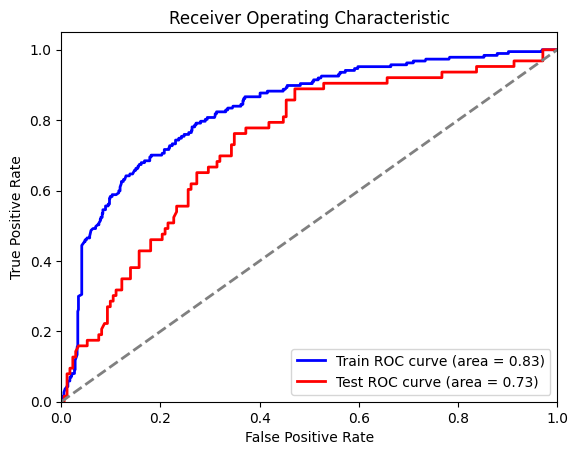

In [42]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# 定义管道步骤
steps = [
    ('tsf', Combine_Transformer()),  # 特征转换
    ('rsc', MinMaxScaler()),         # 特征缩放
    ('svc', SVC(class_weight='balanced', probability=True))  # 使用SVM分类器
]

# 创建管道并训练模型
model = Pipeline(steps)
model.fit(X_train, y_train_c)

# 进行预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算准确率
y_test_c = y_test.map(Popular_judge)  # 将测试数据转换为目标变量
print("Train accuracy_score:", accuracy_score(y_train_c, y_train_pred))
print("Test accuracy_score:", accuracy_score(y_test_c, y_test_pred))

# 计算预测概率
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# 计算ROC曲线和AUC值
fpr_train, tpr_train, _ = roc_curve(y_train_c, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test_c, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [43]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)